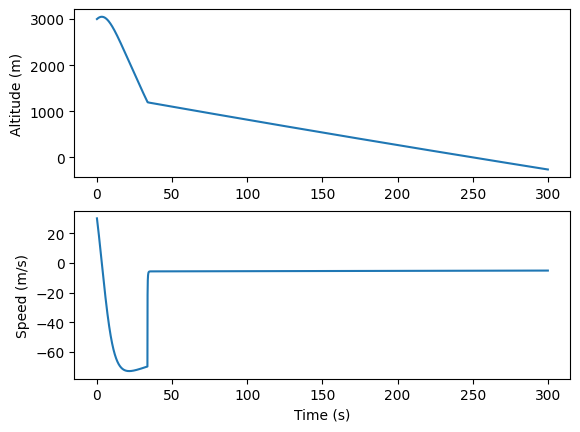

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration
m = 70.0  # total mass of Tom and equipment
rho_0 = 1.225  # sea-level density
y_0 = 3000  # initial altitude
v_0 = 30  # initial speed
CD_T = 0.7  # air resistance coefficient for Tom
A_T = 0.4  # Tom's area
A_p = 30.0  # parachute area
CD_p = 1.33  # parachute drag coefficient
y_p = 1200  # parachute opening altitude

def air_density(y):
    return rho_0 * np.exp(-y / 7249.0)

def drag(v, y, parachute_open):
    A = A_T + parachute_open * (A_p - A_T)
    CD = CD_T + parachute_open * (CD_p - CD_T)
    return 0.5 * air_density(y) * v**2 * A * CD

def simulate_fall(dt, T):
    N = int(T / dt)  # number of time steps
    y = np.zeros(N)
    v = np.zeros(N)
    y[0] = y_0
    v[0] = v_0
    
    for i in range(N - 1):
        parachute_open = y[i] < y_p
        F_drag = drag(v[i], y[i], parachute_open)
        dv = dt * (-g + F_drag / m)
        dy = dt * v[i]
        v[i+1] = v[i] + dv
        y[i+1] = y[i] + dy
    
    return y, v

y, v = simulate_fall(0.01, 300)

t = np.linspace(0, 300, len(y))
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.ylabel('Altitude (m)')
plt.subplot(2, 1, 2)
plt.plot(t, v)
plt.ylabel('Speed (m/s)')
plt.xlabel('Time (s)')
plt.show()

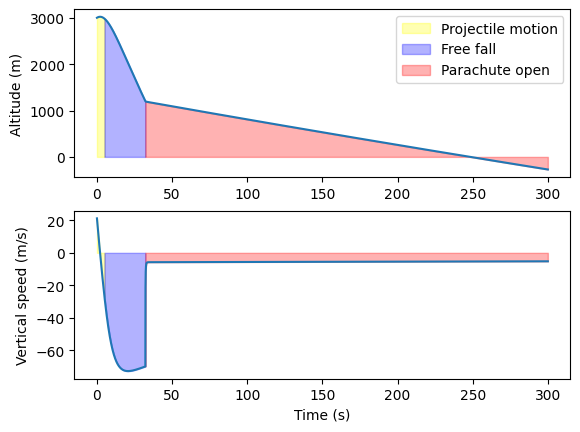

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration
m = 70.0  # total mass of Tom and equipment
rho_0 = 1.225  # sea-level density
y_0 = 3000  # initial altitude
v_0 = 30  # initial speed
angle = np.deg2rad(45)  # initial angle
CD_T = 0.7  # air resistance coefficient for Tom
A_T = 0.4  # Tom's area
A_p = 30.0  # parachute area
CD_p = 1.33  # parachute drag coefficient
y_p = 1200  # parachute opening altitude

# Function to calculate air density
def air_density(y):
    return rho_0 * np.exp(-y / 7249.0)

# Function to calculate drag force
def drag(v, y, parachute_open):
    A = A_T + parachute_open * (A_p - A_T)
    CD = CD_T + parachute_open * (CD_p - CD_T)
    return 0.5 * air_density(y) * v**2 * A * CD

def simulate_fall(dt, T):
    N = int(T / dt)  # number of time steps
    x = np.zeros(N)
    y = np.zeros(N)
    v_x = np.zeros(N)
    v_y = np.zeros(N)
    
    # Initial conditions
    y[0] = y_0
    v_x[0] = v_0 * np.cos(angle)
    v_y[0] = v_0 * np.sin(angle)
    
    for i in range(N - 1):
        t = i * dt
        if t < 5:  # First stage: projectile motion
            parachute_open = False
        elif y[i] > y_p:  # Second stage: free fall
            parachute_open = False
        else:  # Third stage: parachute open
            parachute_open = True
            
        v = np.sqrt(v_x[i]**2 + v_y[i]**2)
        theta = np.arctan2(v_y[i], v_x[i])
        F_drag = drag(v, y[i], parachute_open)
        
        # Decompose the drag force
        F_drag_x = F_drag * np.cos(theta)
        F_drag_y = F_drag * np.sin(theta)
        
        # Update velocities
        v_x[i+1] = v_x[i] - dt * F_drag_x / m
        v_y[i+1] = v_y[i] - dt * (g + F_drag_y / m)
        
        # Update positions
        x[i+1] = x[i] + dt * v_x[i]
        y[i+1] = y[i] + dt * v_y[i]
    
    return x, y, v_x, v_y
    N = int(T / dt)  # number of time steps
    x = np.zeros(N)
    y = np.zeros(N)
    v_x = np.zeros(N)
    v_y = np.zeros(N)
    
    # Initial conditions
    y[0] = y_0
    v_x[0] = v_0 * np.cos(angle)
    v_y[0] = v_0 * np.sin(angle)
    
    for i in range(N - 1):
        parachute_open = y[i] < y_p
        v = np.sqrt(v_x[i]**2 + v_y[i]**2)
        theta = np.arctan2(v_y[i], v_x[i])
        F_drag = drag(v, y[i], parachute_open)
        
        # Decompose the drag force
        F_drag_x = F_drag * np.cos(theta)
        F_drag_y = F_drag * np.sin(theta)
        
        # Update velocities
        v_x[i+1] = v_x[i] - dt * F_drag_x / m
        v_y[i+1] = v_y[i] - dt * (g + F_drag_y / m)
        
        # Update positions
        x[i+1] = x[i] + dt * v_x[i]
        y[i+1] = y[i] + dt * v_y[i]
    
    return x, y, v_x, v_y


x, y, v_x, v_y = simulate_fall(0.01, 300)

t = np.linspace(0, 300, len(y))
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.ylabel('Altitude (m)')
plt.fill_between(t, y, where=(t<5), color='yellow', alpha=0.3, label='Projectile motion')
plt.fill_between(t, y, where=(t>=5) & (y>=y_p), color='blue', alpha=0.3, label='Free fall')
plt.fill_between(t, y, where=y<y_p, color='red', alpha=0.3, label='Parachute open')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, v_y)
plt.ylabel('Vertical speed (m/s)')
plt.xlabel('Time (s)')
plt.fill_between(t, v_y, where=(t<5), color='yellow', alpha=0.3)
plt.fill_between(t, v_y, where=(t>=5) & (y>=y_p), color='blue', alpha=0.3)
plt.fill_between(t, v_y, where=y<y_p, color='red', alpha=0.3)
plt.show()

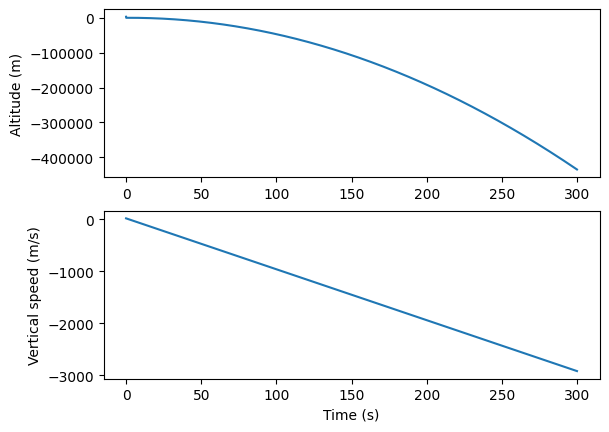

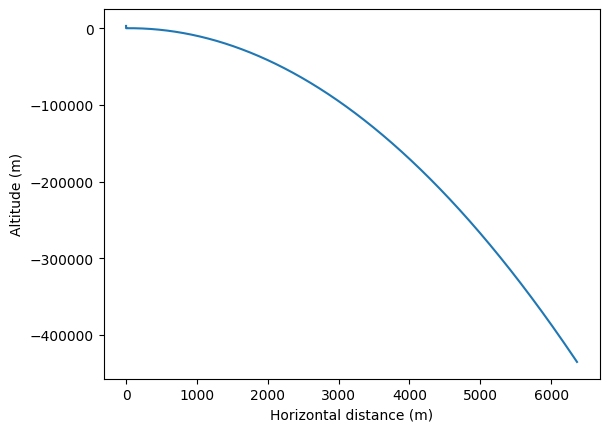

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration
m = 70.0  # total mass of Tom and equipment
rho_0 = 1.225  # sea-level density
y_0 = 3000  # initial altitude
v_0 = 30  # initial speed
angle = np.deg2rad(45)  # initial angle
CD_T = 0.0  # air resistance coefficient for Tom
A_T = 0.4  # Tom's area
A_p = 30.0  # parachute area
CD_p = 0.0  # parachute drag coefficient
y_p = 1200  # parachute opening altitude

# Function to calculate air density
def air_density(y):
    return rho_0 * np.exp(-y / 7249.0)

# Function to calculate drag force
def drag(v, y, parachute_open):
    A = A_T + parachute_open * (A_p - A_T)
    CD = CD_T + parachute_open * (CD_p - CD_T)
    return 0.5 * air_density(y) * v**2 * A * CD

# Function to simulate fall
def simulate_fall(dt, T):
    N = int(T / dt)  # number of time steps
    x = np.zeros(N)
    y = np.zeros(N)
    v_x = np.zeros(N)
    v_y = np.zeros(N)
    
    # Initial conditions
    y[0] = y_0
    v_x[0] = v_0 * np.cos(angle)
    v_y[0] = v_0 * np.sin(angle)
    
    for i in range(N - 1):
        t = i * dt
        if CD_T == 0.0 and CD_p == 0.0:  # No drag: analytic solution
            x[i+1] = v_x[0] * (i+1) * dt
            y[i+1] = v_y[0] * (i+1) * dt - 0.5 * g * (i+1)**2 * dt**2
            v_x[i+1] = v_x[0]
            v_y[i+1] = v_y[0] - g * (i+1) * dt
        else:  # Regular simulation with drag
            parachute_open = y[i] < y_p
            v = np.sqrt(v_x[i]**2 + v_y[i]**2)
            theta = np.arctan2(v_y[i], v_x[i])
            F_drag = drag(v, y[i], parachute_open)
            
            # Decompose the drag force
            F_drag_x = F_drag * np.cos(theta)
            F_drag_y = F_drag * np.sin(theta)
            
            # Update velocities
            v_x[i+1] = v_x[i] - dt * F_drag_x / m
            v_y[i+1] = v_y[i] - dt * (g + F_drag_y / m)
            
            # Update positions
            x[i+1] = x[i] + dt * v_x[i]
            y[i+1] = y[i] + dt * v_y[i]
    
    return x, y, v_x, v_y

# Run simulation and plot results
x, y, v_x, v_y = simulate_fall(0.01, 300)

t = np.linspace(0, 300, len(y))
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.ylabel('Altitude (m)')

plt.subplot(2, 1, 2)
plt.plot(t, v_y)
plt.ylabel('Vertical speed (m/s)')
plt.xlabel('Time (s)')
plt.show()

plt.figure()
plt.plot(x, y)
plt.xlabel('Horizontal distance (m)')
plt.ylabel('Altitude (m)')
plt.show()

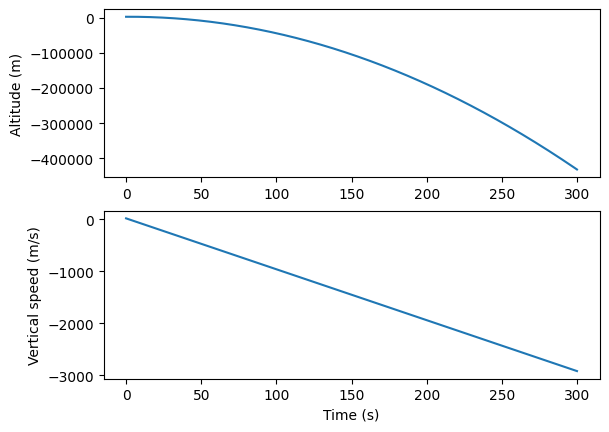

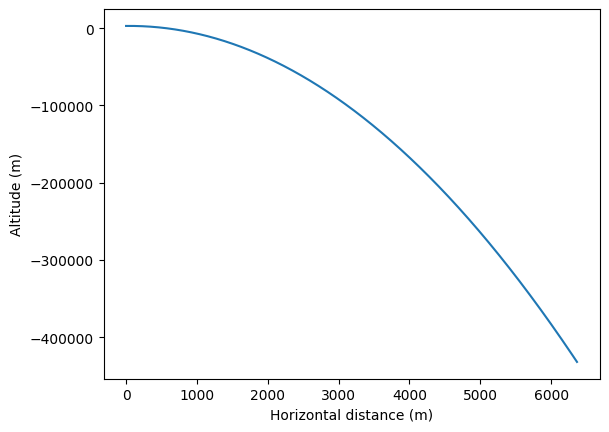

In [8]:
def acceleration(t, y, v, parachute_open):
    v_norm = np.sqrt(v[0]**2 + v[1]**2)
    theta = np.arctan2(v[1], v[0])
    F_drag = drag(v_norm, y[1], parachute_open)
    F_drag_x = F_drag * np.cos(theta)
    F_drag_y = F_drag * np.sin(theta)
    return np.array([-F_drag_x / m, -g - F_drag_y / m])

def simulate_fall_RK4(dt, T):
    N = int(T / dt)  # number of time steps
    y = np.zeros((N, 2))  # position at each time step
    v = np.zeros((N, 2))  # velocity at each time step
    
    # Initial conditions
    y[0] = [0, y_0]  # start at ground level, specified altitude
    v[0] = [v_0 * np.cos(angle), v_0 * np.sin(angle)]  # initial velocity
    
    for i in range(N - 1):
        t = i * dt
        parachute_open = y[i, 1] < y_p
        k1_y = dt * v[i]
        k1_v = dt * acceleration(t, y[i], v[i], parachute_open)
        
        k2_y = dt * (v[i] + 0.5 * k1_v)
        k2_v = dt * acceleration(t + 0.5 * dt, y[i] + 0.5 * k1_y, v[i] + 0.5 * k1_v, parachute_open)
        
        k3_y = dt * (v[i] + 0.5 * k2_v)
        k3_v = dt * acceleration(t + 0.5 * dt, y[i] + 0.5 * k2_y, v[i] + 0.5 * k2_v, parachute_open)
        
        k4_y = dt * (v[i] + k3_v)
        k4_v = dt * acceleration(t + dt, y[i] + k3_y, v[i] + k3_v, parachute_open)
        
        y[i+1] = y[i] + (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6
        v[i+1] = v[i] + (k1_v + 2*k2_v + 2*k3_v + k4_v) / 6
    
    return y, v
y, v = simulate_fall_RK4(0.01, 300)

t = np.linspace(0, 300, len(y))
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, y[:, 1])
plt.ylabel('Altitude (m)')
plt.subplot(2, 1, 2)
plt.plot(t, v[:, 1])
plt.ylabel('Vertical speed (m/s)')
plt.xlabel('Time (s)')
plt.show()

plt.figure()
plt.plot(y[:, 0], y[:, 1])
plt.xlabel('Horizontal distance (m)')
plt.ylabel('Altitude (m)')
plt.show()


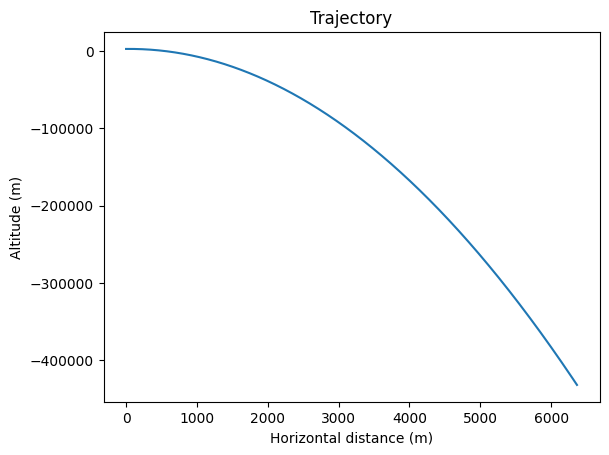

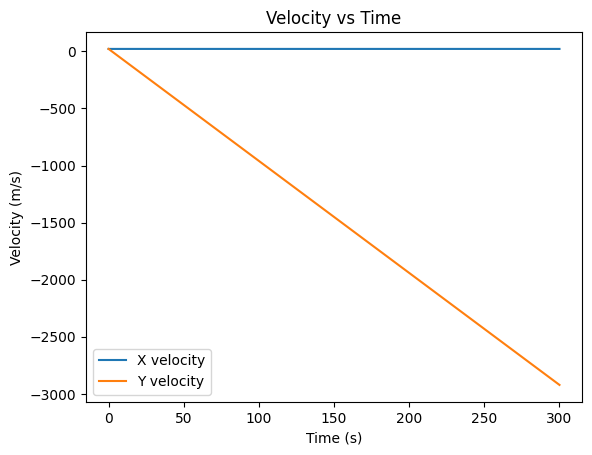

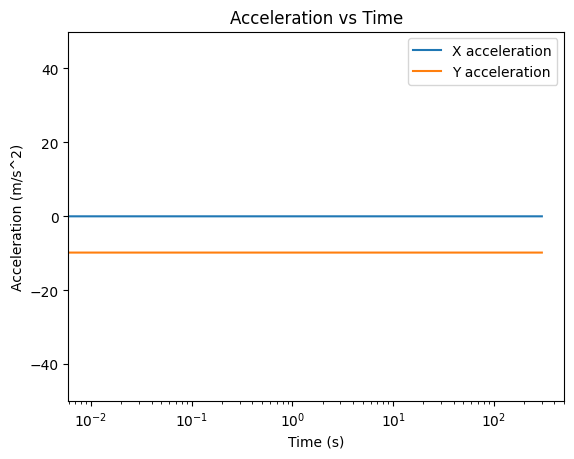

In [9]:
# Run the simulation
y, v = simulate_fall_RK4(0.01, 300)

# Calculate acceleration
a = np.zeros_like(v)
for i in range(len(a) - 1):
    a[i] = (v[i+1] - v[i]) / 0.01
a[-1] = a[-2]  # Fill the last element

t = np.linspace(0, 300, len(y))

# 1. Plot of the trajectory (x vs y)
plt.figure()
plt.plot(y[:, 0], y[:, 1])
plt.xlabel('Horizontal distance (m)')
plt.ylabel('Altitude (m)')
plt.title('Trajectory')
plt.show()

# 2. Plot of the velocity with time
plt.figure()
plt.plot(t, v[:, 0], label='X velocity')
plt.plot(t, v[:, 1], label='Y velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.legend()
plt.show()

# 3. Plot of the acceleration with time
plt.figure()
plt.semilogx(t, a[:, 0], label='X acceleration')
plt.semilogx(t, a[:, 1], label='Y acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time')
plt.legend()
plt.ylim([-50, 50])  # Limit the y-axis to avoid poor scaling
plt.show()

In [10]:
# 1. Find parachute opening altitude for 25 seconds of free fall

# Initial guess
y_p_low = 0
y_p_high = y_0

while y_p_high - y_p_low > 1:  # Stop when the interval is small enough
    y_p = (y_p_low + y_p_high) / 2
    y, v = simulate_fall_RK4(0.01, 300)
    
    # Find the time of parachute opening
    parachute_open_index = np.where(y[:, 1] < y_p)[0][0]
    parachute_open_time = parachute_open_index * 0.01
    
    # Check if the free fall time is close to 25 seconds
    if parachute_open_time < 25:
        y_p_high = y_p
    else:
        y_p_low = y_p

print(f"To achieve 25 seconds of free fall, the parachute must be deployed at {y_p} m altitude.")

# 2. Find the highest point of the trajectory

highest_point_index = np.argmax(y[:, 1])
highest_point = y[highest_point_index]
print(f"The highest point of the trajectory is at ({highest_point[0]}, {highest_point[1]}) m.")

# 3. Find the position of parachute deployment

parachute_open_position = y[parachute_open_index]
print(f"The parachute is deployed at ({parachute_open_position[0]}, {parachute_open_position[1]}) m.")

To achieve 25 seconds of free fall, the parachute must be deployed at 466.552734375 m altitude.
The highest point of the trajectory is at (45.82051942088843, 3022.935751420888) m.
The parachute is deployed at (530.3300858899341, 464.70508588993994) m.


: 